<a href="https://colab.research.google.com/github/MokidiSrinidhi/XAI/blob/main/XAI_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset
data = {
    "Visits": [2, 4, 3, 2, 5],
    "Connections": [10, 20, 15, 12, 25]
}
df = pd.DataFrame(data)

# Step 1: Linear Regression
X = df[["Visits"]]
y = df["Connections"]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Regression Equation: ŷ = {intercept:.2f} + {slope:.2f}x")

# Step 2: Baseline
baseline = y.mean()
print(f"Baseline (mean of y): {baseline:.2f}")

# Step 3 & 4: Predictions, SHAP, Final Prediction
df["Predicted"] = model.predict(X)
df["SHAP"] = df["Predicted"] - baseline
df["Final Prediction"] = baseline + df["SHAP"]
df["Error"] = df["Connections"] - df["Predicted"]
df["Result"] = np.where(df["Error"] > 0, "Underprediction", "Overprediction")

print("\nResults Table:")
print(df)


Linear Regression Equation: ŷ = 1.53 + 4.65x
Baseline (mean of y): 16.40

Results Table:
   Visits  Connections  Predicted      SHAP  Final Prediction     Error  \
0       2           10  10.823529 -5.576471         10.823529 -0.823529   
1       4           20  20.117647  3.717647         20.117647 -0.117647   
2       3           15  15.470588 -0.929412         15.470588 -0.470588   
3       2           12  10.823529 -5.576471         10.823529  1.176471   
4       5           25  24.764706  8.364706         24.764706  0.235294   

            Result  
0   Overprediction  
1   Overprediction  
2   Overprediction  
3  Underprediction  
4  Underprediction  


In [2]:
# 2303A52353 B37
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

shap.initjs()


In [3]:
# Question 1
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
# Load dataset
df = pd.read_excel("/content/sample_data/Car_Sales.xlsx")

Model: y = 5.00 * x + 10.00
Prediction for 10 TV ads: 60.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


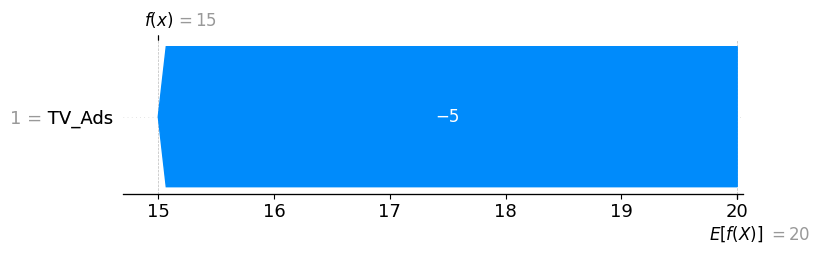

In [5]:
 #Rename columns for clarity
df = df.rename(columns={
    'Number of TV Ads (x)': 'TV_Ads',
    'Number of Cars Sold (y)': 'Cars_Sold'
})

X = df[['TV_Ads']]
y = df['Cars_Sold']

# Train model
model = LinearRegression()
model.fit(X, y)

# Equation and prediction
print(f"Model: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")
print("Prediction for 10 TV ads:", model.predict([[10]])[0])

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)


In [6]:
# Question 2
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:
# Load dataset
df = pd.read_excel("/content/sample_data/StudyHour.xlsx")

Model: y = 0.50*IQ + 0.50*Hours + 20.00
Prediction for IQ=95 and Study Hours=25: 80.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


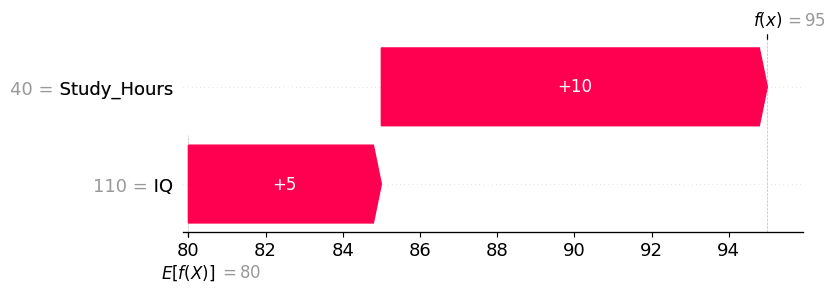

In [8]:
# Clean up column names
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'IQ': 'IQ',
    'IQ \n': 'IQ',  # handle newline variant
    'StudyHours': 'Study_Hours',
    'TestScore': 'Test_Score'
})

X = df[['IQ', 'Study_Hours']]
y = df['Test_Score']

# Train model
model = LinearRegression()
model.fit(X, y)

# Equation and prediction
print(f"Model: y = {model.coef_[0]:.2f}*IQ + {model.coef_[1]:.2f}*Hours + {model.intercept_:.2f}")
print("Prediction for IQ=95 and Study Hours=25:", model.predict([[95, 25]])[0])

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)


Model: y = 9449.96 * x + 25792.20
Prediction for 3.5 years: 58867.06832376146
Prediction for 7 years: 91941.93644885422


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


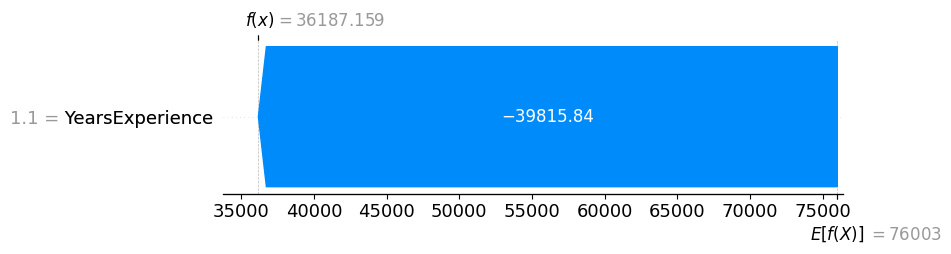

In [9]:
#Question 3
# Load dataset
df = pd.read_csv("/content/sample_data/Experience_Salary.csv")

# Features and label
X = df[['YearsExperience']]
y = df['Salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Equation and predictions
print(f"Model: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")
print("Prediction for 3.5 years:", model.predict([[3.5]])[0])
print("Prediction for 7 years:", model.predict([[7]])[0])

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)


Model: y = 8.22*Int + 49.71*Ext + 993.92
Prediction for Int=100, Ext=25: 3058.631617109059
Prediction for Int=120, Ext=18: 2875.0694134905466


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


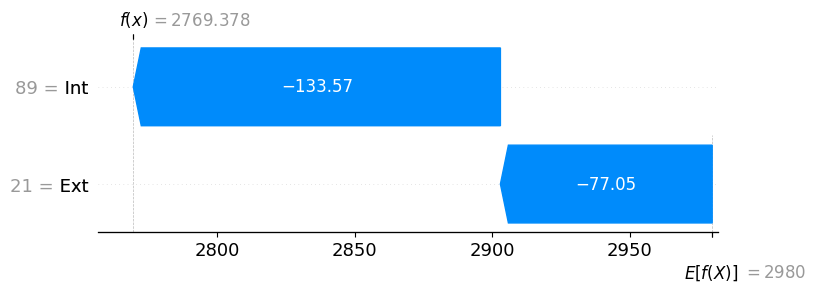

In [10]:
# Question 4
# Load dataset
df = pd.read_excel("/content/sample_data/Int_Ext.xlsx")
df = df[['Int', 'Ext', 'sal']].dropna()

# Features and label
X = df[['Int', 'Ext']]
y = df['sal']

# Train model
model = LinearRegression()
model.fit(X, y)

# Equation and predictions
print(f"Model: y = {model.coef_[0]:.2f}*Int + {model.coef_[1]:.2f}*Ext + {model.intercept_:.2f}")
print("Prediction for Int=100, Ext=25:", model.predict([[100, 25]])[0])
print("Prediction for Int=120, Ext=18:", model.predict([[120, 18]])[0])

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)


Model: y = 0.20*facebook + 0.01*newspaper + 11.00
Prediction for Facebook=50, Newspaper=70: 21.442951634688967
Prediction for Facebook=25, Newspaper=30: 16.184654364042814


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


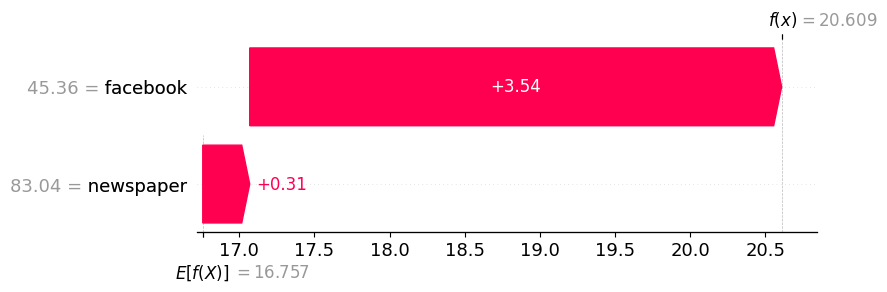

In [11]:
# Question 5
# Load dataset
df = pd.read_excel("/content/sample_data/Marketing_Dataset.xlsx")
df = df[['facebook', 'newspaper', 'sales']].dropna()

# Features and label
X = df[['facebook', 'newspaper']]
y = df['sales']

# Train model
model = LinearRegression()
model.fit(X, y)

# Equation and predictions
print(f"Model: y = {model.coef_[0]:.2f}*facebook + {model.coef_[1]:.2f}*newspaper + {model.intercept_:.2f}")
print("Prediction for Facebook=50, Newspaper=70:", model.predict([[50, 70]])[0])
print("Prediction for Facebook=25, Newspaper=30:", model.predict([[25, 30]])[0])

# SHAP explanation
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)
